Neural networks can sometimes be easily fooled. Try to create a random-looking image that makes the NN from [CNNIntro.ipynb](CNNIntro.ipynb) think that it sees a cat. 

(You need to run that notebook before to get the model that we load (`load_model`) below!)

In [2]:
import keras
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [4]:
model = keras.models.load_model("CNNIntro_model.h5")

W0910 14:53:26.822537 140108377229120 deprecation_wrapper.py:119] From /software/opt/bionic/x86_64/anaconda3/2019.07/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0910 14:53:26.837376 140108377229120 deprecation_wrapper.py:119] From /software/opt/bionic/x86_64/anaconda3/2019.07/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0910 14:53:26.855187 140108377229120 deprecation_wrapper.py:119] From /software/opt/bionic/x86_64/anaconda3/2019.07/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0910 14:53:26.858599 140108377229120 deprecation_wrapper.py:119] From /software/opt/bionic/x86_64/anaconda3/2019.07/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name tf

Start with this random image:

In [5]:
rnd_img = 0.1*np.random.rand(1, 32, 32, 3)

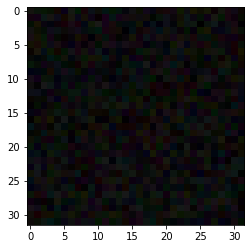

In [6]:
plt.imshow(rnd_img[0])

What does our model say to this?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

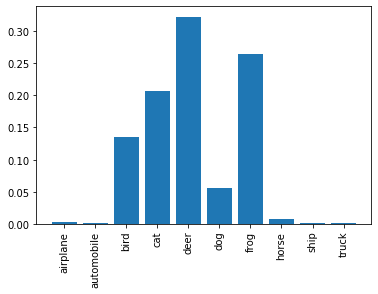

In [7]:
plt.bar(labels, model.predict(rnd_img)[0])
plt.xticks(rotation=90)

Let's see if we can modify the image such that the NN thinks this is a cat. So we want to maximise the output for cat:

In [66]:
cat_loss = K.mean(model.output[:,labels.index('cat')])
cat_loss

<tf.Tensor 'Mean_6:0' shape=() dtype=float32>

By calculating the gradient w.r.t. the input image

In [67]:
grad_inp_fn = K.function([model.input], K.gradients(cat_loss, [model.input]))

Now, call this function on the input image and create a new one by successively following the gradient for a few steps and check if the neural network then sees a cat. The function is called with a list of one element in this case and returns one element:

In [68]:
grad_inp_fn([rnd_img])

[array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.85036513e-04, -1.17516254e-04, -2.17117020e-04],
          ...,
          [ 1.44519348e-04,  1.50033098e-04, -4.67086065e-04],
          [ 1.00197401e-04,  7.27225415e-05,  1.13969072e-05],
          [ 1.15650910e-04,  1.62785043e-04,  6.54946489e-05]],
 
         [[ 4.10168519e-04,  1.74530840e-04,  1.12885726e-04],
          [-5.46147232e-04, -2.10716651e-04, -1.14489594e-04],
          [-1.81765703e-04,  6.13257405e-04, -9.41167120e-04],
          ...,
          [-4.56439011e-04, -1.37566298e-04, -4.37592098e-04],
          [ 2.50365702e-05,  2.52473372e-04,  4.73593129e-04],
          [ 1.12166737e-04, -8.27112817e-05, -2.18082656e-04]],
 
         [[ 3.93427530e-04,  1.77208189e-04,  2.17451961e-04],
          [-1.27467583e-03,  1.08783010e-04, -1.89247163e-04],
          [ 7.39875133e-04,  3.35591682e-03,  3.43541894e-03],
          ...,
    

(32, 32, 3) (1, 32, 32, 3) (1, 32, 32, 3)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

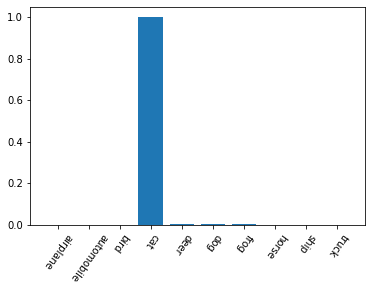

In [71]:
def nstep(img,grad,n,rate=1):
    
    for i in range(n):
        imgn = img + rate*grad[0]
        img = imgn*1
        grad=grad_inp_fn([imgn])
    
    return imgn


new_rand_img = nstep(rnd_img,grad_inp_fn([rnd_img]),1)
new_rand_img = nstep(new_rand_img,grad_inp_fn([new_rand_img]),100)
print(rnd_img[0].shape,grad_inp_fn([rnd_img])[0].shape,new_rand_img.shape)

plt.bar(labels, model.predict(new_rand_img)[0])
plt.xticks(rotation=np.random.randint(10000))


W0910 15:07:49.958886 140108377229120 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


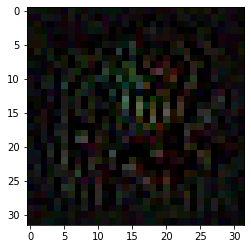

In [50]:
plt.imshow(new_rand_img[0])